### Shors error correction code.

The following code demonstrates the shors code for error correction where the outer parts do a PauliX correction (bit flip), the inner parts do a PauliZ correction and (Y = iXZ) both of them together do a phase correction. 

(<Figure size 1500x1000 with 1 Axes>, <Axes: >)

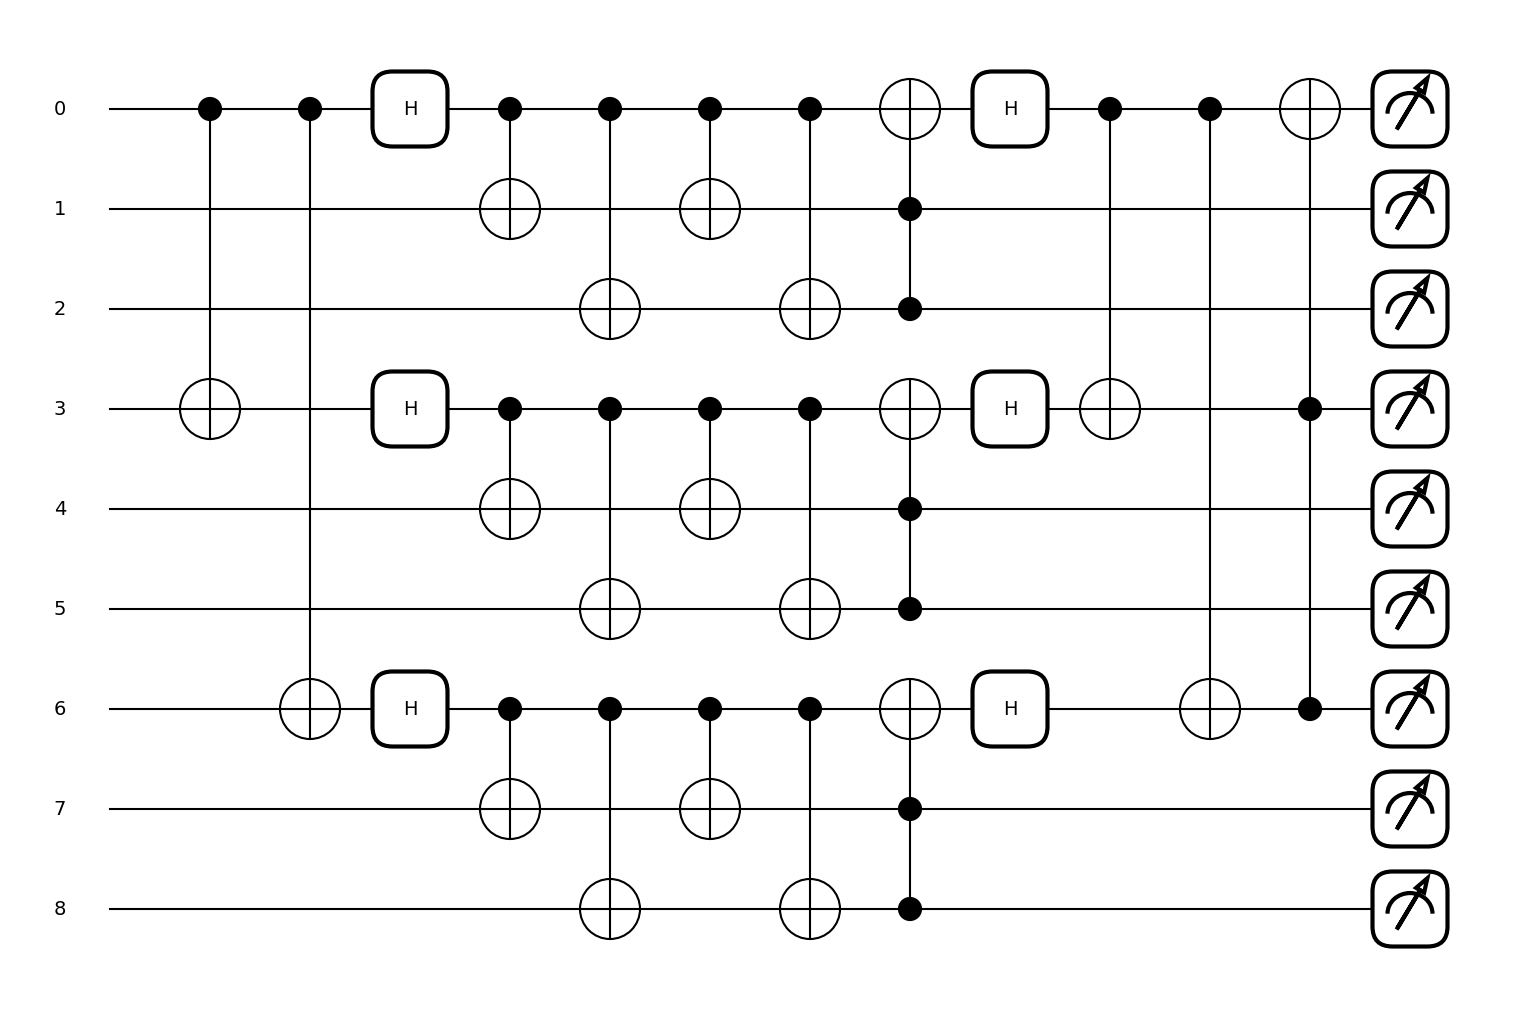

In [4]:
import pennylane as qml
import numpy as np 

dev = qml.device("default.qubit", wires=9)

@qml.qnode(dev)
def shor(state, error_type, wires):
    qml.CNOT(wires=[0,3])
    qml.CNOT(wires=[0,6])
    
    for wire in range(0,7,3):
        qml.Hadamard(wire)
    
    for wire in [0,3,6]:
        qml.CNOT(wires=[wire,wire+1])
        qml.CNOT(wires=[wire,wire+2])
        
    
    # # apply the error
    # for err in error(error_type=error_type, wires=wires):
    #     err
        
    for wire in [0,3,6]:
        qml.CNOT(wires=[wire,wire+1])
        qml.CNOT(wires=[wire,wire+2])
    
    for wire in [0,3,6]:
        qml.Toffoli(wires=[wire+2,wire+1,wire])
        
    for wire in range(0,7,3):
        qml.Hadamard(wire)
    
    qml.CNOT(wires=[0,3])
    qml.CNOT(wires=[0,6])
    
    qml.Toffoli(wires=[6,3,0])
        
    return qml.probs(wires=0), qml.probs(wires=range(1, 9))

qml.draw_mpl(shor)([1/np.sqrt(2), 2/np.sqrt(2)], None, 9)


In [5]:
import numpy
numpy.version.version


'1.23.5'